In [2]:
import pandas as pd

data_dir = 'C:/ZhangLI/Codes/DataSet/个人违贷/official_data/'
train_pub = pd.read_csv(data_dir+'train_public.csv')
train_net = pd.read_csv(data_dir+'train_internet.csv')
test_pub = pd.read_csv(data_dir+'test_public.csv')

In [7]:
train_public
train_net
test_pub

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon
0,1000575,200575,2890.909091,3,10.791,88.01,B,幼教与中小学校,住宿和餐饮业,5 years,...,0,1,2.0,0.0,15.0,5.0,4.0,3,773,89.192308
1,1028125,228125,7272.727273,3,9.990,258.10,B,普通企业,批发和零售业,10+ years,...,6,1,8.0,0.0,8.0,29.0,14.0,1,1894,218.538462
2,1010694,210694,26295.454550,3,15.763,764.03,C,普通企业,住宿和餐饮业,10+ years,...,268,1,6.0,0.0,4.0,10.0,6.0,1,5670,1221.230769
3,1026712,226712,22690.909090,5,19.305,524.30,D,普通企业,采矿业,10+ years,...,0,1,4.0,0.0,12.0,10.0,8.0,2,4800,443.076923
4,1002895,202895,14545.454550,3,7.139,490.32,A,世界五百强,金融业,1 year,...,5,1,4.0,0.0,7.0,14.0,9.0,0,3516,649.107692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1008856,208856,9454.545455,5,12.015,183.47,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,...,10595,1,NaN,NaN,NaN,NaN,NaN,0,0,0.000000
4996,1016651,216651,5500.000000,3,7.970,172.28,A,政府机构,房地产业,5 years,...,0,1,3.0,0.0,2.0,5.0,3.0,3,1564,0.000000
4997,1024140,224140,30545.454550,3,8.900,889.09,A,上市企业,房地产业,10+ years,...,21735,1,8.0,0.0,17.0,20.0,14.0,2,5456,1510.892308
4998,1014316,214316,4090.909091,3,6.030,152.18,A,政府机构,文化和体育业,10+ years,...,24272,1,1.0,0.0,6.0,10.0,10.0,3,223,41.169231


In [3]:
# the different of 
train_pub.shape
# test_pub.columns
test_pub.shape
train_net.shape
test_pub.loan_id.unique().shape

# 数据中有重复的特征
# pub 和 net 中的特征表达的意义一样 -- 验证想法
train_df = pd.merge(left=train_pub, right=train_net, how='left', on=['loan_id'], suffixes=('_x', '_y'))

In [57]:
train_df.columns

Index(['loan_id', 'user_id_x', 'total_loan_x', 'year_of_loan_x', 'interest_x',
       'monthly_payment_x', 'class_x', 'employer_type_x', 'industry_x',
       'work_year_x', 'house_exist_x', 'censor_status_x', 'issue_date_x',
       'use_x', 'post_code_x', 'region_x', 'debt_loan_ratio_x',
       'del_in_18month_x', 'scoring_low_x', 'scoring_high_x',
       'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup_x',
       'recircle_b_x', 'recircle_u_x', 'initial_list_status_x', 'app_type',
       'earlies_credit_mon_x', 'title_x', 'policy_code_x', 'f0_x', 'f1_x',
       'f2_x', 'f3_x', 'f4_x', 'early_return_x', 'early_return_amount_x',
       'early_return_amount_3mon_x', 'isDefault', 'user_id_y', 'total_loan_y',
       'year_of_loan_y', 'interest_y', 'monthly_payment_y', 'class_y',
       'sub_class', 'work_type', 'employer_type_y', 'industry_y',
       'work_year_y', 'house_exist_y', 'house_loan_status', 'censor_status_y',
       'marriage', 'offsprings', 'issue_date_y', 'use_y', 'p

In [78]:
train_net.loan_id
train_pub.isDefault.value_counts()
# train_df[['total_loan_x','total_loan_y']]

0    8317
1    1683
Name: isDefault, dtype: int64

In [83]:
train_net[train_net.user_id == 239708]

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,sub_class,work_type,employer_type,...,earlies_credit_mon,title,policy_code,f0,f1,f2,f3,f4,f5,is_default
239708,374740,239708,18000.0,3,7.69,561.49,A,A4,其他,普通企业,...,Nov-1996,0.0,1.0,6.0,0.0,17.0,14.0,9.0,7.0,1


In [4]:
# 共有 特征
len(train_pub.columns)
len(train_net.columns)
train_net['isDefault'] = train_net['is_default']
common_feature = list(set(train_pub.columns).intersection(set(train_net.columns)))
train_pub_new = train_pub[common_feature]
train_net_new = train_net[common_feature]

# test_pub

In [5]:
# 特征处理
# date type / baseline
dataframe = train_net_new
dataframe['issue_date'] = pd.to_datetime(dataframe['issue_date'])
dataframe['issue_date_y'] = dataframe['issue_date'].dt.year
dataframe['issue_date_m'] = dataframe['issue_date'].dt.month
dataframe['issue_date_d'] = dataframe['issue_date'].dt.day
# set origin date
# get the diff bewteen now and origin-date
import datetime
origin_date = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
dataframe['issue_date_diff'] = dataframe['issue_date'].apply(lambda x: x-origin_date).dt.days
dataframe.drop('issue_date', axis = 1, inplace = True)
# 就业类型
dataframe['employer_type'].value_counts().index
# 行业
dataframe['industry'].value_counts().index
# 
dataframe['work_year'].fillna('10+ years', inplace=True)

work_year_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1,
     '5 years': 5, '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}
dataframe['work_year']  = dataframe['work_year'].map(work_year_map)

dataframe['class'] = dataframe['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

dataframe['employer_type'] = dataframe['employer_type'].map(emp_type_dict)

dataframe['industry'] = dataframe['industry'].map(industry_dict)

<ipython-input-5-de883eaf60dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['issue_date'] = pd.to_datetime(dataframe['issue_date'])
<ipython-input-5-de883eaf60dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['issue_date_y'] = dataframe['issue_date'].dt.year
<ipython-input-5-de883eaf60dd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

NameError: name 'emp_type_dict' is not defined

In [ ]:
# employer_type 
# industry
# work_year
# class
# employer_type
# industry

# 就业类型
dataframe['employer_type'].value_counts().index
# 行业
dataframe['industry'].value_counts().index
# 
dataframe['work_year'].fillna('10+ years', inplace=True)

work_year_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1,
     '5 years': 5, '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}
dataframe['work_year']  = dataframe['work_year'].map(work_year_map)

dataframe['class'] = dataframe['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

dataframe['employer_type'] = dataframe['employer_type'].map(emp_type_dict)

dataframe['industry'] = dataframe['industry'].map(industry_dict)

In [142]:
import datetime
def preprocessor(dataframe):
    dataframe['issue_date'] = pd.to_datetime(dataframe['issue_date'])
    dataframe['issue_date_y'] = dataframe['issue_date'].dt.year
    dataframe['issue_date_m'] = dataframe['issue_date'].dt.month
    dataframe['issue_date_d'] = dataframe['issue_date'].dt.day
    
    # dataframe['earlies_credit_y'] = dataframe['earlies_credit_mon'].split('-')[1]
    dataframe.drop('earlies_credit_mon', axis = 1, inplace = True)
    # dataframe['earlies_credit_y'] = dataframe['earlies_credit_mon'].split('-')[0].map()
    # set origin date
    # get the diff bewteen now and origin-date
    origin_date = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
    dataframe['issue_date_diff'] = dataframe['issue_date'].apply(lambda x: x-origin_date).dt.days
    dataframe.drop('issue_date', axis = 1, inplace = True)
    # 就业类型
    employer_type = dataframe['employer_type'].value_counts().index
    industry = dataframe['industry'].value_counts().index
    # dict()
    emp_type_dict = dict(zip(employer_type, [0,1,2,3,4,5]))
    industry_dict = dict(zip(industry, [i for i in range(15)]))
    # 
    dataframe['work_year'].fillna('10+ years', inplace=True)

    work_year_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1,
         '5 years': 5, '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}
    dataframe['work_year']  = dataframe['work_year'].map(work_year_map)

    dataframe['class'] = dataframe['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

    dataframe['employer_type'] = dataframe['employer_type'].map(emp_type_dict)

    dataframe['industry'] = dataframe['industry'].map(industry_dict)
    return dataframe

c:\zhangli\software\installer\python38\lib\site-packages\lightgbm\basic.py:1222: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  _log_warning('{0} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.800736
[200]	valid_0's auc: 0.801591
[300]	valid_0's auc: 0.801698
[400]	valid_0's auc: 0.801717
Early stopping, best iteration is:
[332]	valid_0's auc: 0.801783


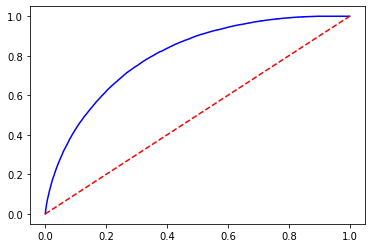

KeyError: None

In [150]:
# 数据拼接
train_net['isDefault'] = train_net['is_default']
common_feature = list(set(train_pub.columns).intersection(set(train_net.columns)))
train_pub_new = train_pub[common_feature]
train_net_new = train_net[common_feature]
train_df = pd.concat([train_pub_new, train_net_new])
# 特征处理
train_df_new = preprocessor(train_df)
# 模型训练
X_train = train_df_new.drop('isDefault', axis=1)
y_train = train_df_new['isDefault']
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2)
import lightgbm as lgb
train_matrix = lgb.Dataset(train_x, label=train_y)
valid_matrix = lgb.Dataset(val_x, label=val_y)
params = {
    'boosting_type': 'gbdt',
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 31,
            'max_depth': -1,
            'reg_lambda': 0,
            'reg_alpha': 0,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 0,
            'seed': 2020,
            'nthread': 8,
            'silent': True,
            'verbose': -1,
}

model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=2000, verbose_eval=100, early_stopping_rounds=100)

from sklearn import metrics
from sklearn.metrics import roc_auc_score

val_pred_lgb = model.predict(val_x, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(val_y, val_pred_lgb)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.show()
# 模型预测
common_feature.remove('isDefault')
test_pub_new = test_pub[common_feature]
test_df_new = preprocessor(test_pub_new)
predict = model.predict(test_df_new, num_iteration=model.best_iteration)
# 生成结果
submission = pd.DataFrame({'id':test_pub_new['loan_id'], 'isDefault':predict})
submission.to_csv('submission.csv', index = None)

In [160]:
common_feature = list(set(train_pub.columns).intersection(set(train_net.columns)))
common_feature.remove('isDefault')
test_pub_new = test_pub[common_feature]
test_df_new = preprocessor(test_pub_new)
predict = model.predict(test_df_new, num_iteration=model.best_iteration)
submission = pd.DataFrame({'id':test_pub_new['loan_id'], 'isDefault':predict})
submission.to_csv('submission.csv', index = None)

<ipython-input-142-afc75898c025>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['issue_date'] = pd.to_datetime(dataframe['issue_date'])
<ipython-input-142-afc75898c025>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['issue_date_y'] = dataframe['issue_date'].dt.year
<ipython-input-142-afc75898c025>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [161]:
submission

,id,isDefault
0,1000575,0.021674
1,1028125,0.028243
2,1010694,0.002758
3,1026712,0.009859
4,1002895,0.014780
...,...,...
4995,1008856,0.510007
4996,1016651,0.048404
4997,1024140,0.002037
4998,1014316,0.018442


In [230]:
# NN 
# hyper param
# other model
# NN
# new df
train_df_new
test_df_new
# standarzation 
import numpy as np
def standarzation(dataframe): 
    dataframe = dataframe.fillna(0)
    train_df_nn = dataframe.drop(['isDefault','policy_code', 'issue_date_d'], axis=1)
    # train_df_nn = train_df_new
    f_mean = train_df_nn.mean().astype(np.float32)
    f_std = train_df_nn.std().astype(np.float32)
    train_nn = (train_df_nn - f_mean) / f_std
    X_train_nn = train_nn
    y_train_nn = dataframe['isDefault']
    return X_train_nn, y_train_nn

In [323]:
# 76000, 38, lasted columns is label
train_nn  
input_shape = train_nn.shape[1]-3
what_size = 0
from tensorflow import keras
init = keras.initializers.glorot_uniform(seed=1)
opt = keras.optimizers.Adam(learning_rate=0.001)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC
# sequential NN
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=256, input_dim=input_shape, kernel_initializer='he_normal', activation='relu',kernel_regularizer=l2(0.0001)))
model.add(keras.layers.LayerNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units= 64, kernel_initializer='he_normal', activation='relu'))
model.add(keras.layers.LayerNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy',AUC(name='auc')])

print("Starting NN training")
X_train_nn, y_train_nn = standarzation(train_df_new)
# batch_size
# epochs 

his = model.fit(X_train_nn, y_train_nn, batch_size=640, epochs=20, shuffle=True, verbose=1)
print("NN training finished")


Starting NN training
Epoch 1/20
1188/1188 [==============================] - 18s 15ms/step - loss: 0.4846 - accuracy: 0.8010 - auc: 0.7330
Epoch 2/20
1188/1188 [==============================] - 18s 15ms/step - loss: 0.4413 - accuracy: 0.8104 - auc: 0.7652
Epoch 3/20
1188/1188 [==============================] - 19s 16ms/step - loss: 0.4233 - accuracy: 0.8118 - auc: 0.7796
Epoch 4/20
1188/1188 [==============================] - 17s 14ms/step - loss: 0.4140 - accuracy: 0.8131 - auc: 0.7887
Epoch 5/20
1188/1188 [==============================] - 17s 14ms/step - loss: 0.4110 - accuracy: 0.8139 - auc: 0.7912
Epoch 6/20
1188/1188 [==============================] - 17s 14ms/step - loss: 0.4099 - accuracy: 0.8143 - auc: 0.7919
Epoch 7/20
1188/1188 [==============================] - 17s 14ms/step - loss: 0.4087 - accuracy: 0.8146 - auc: 0.7929
Epoch 8/20
1188/1188 [==============================] - 16s 14ms/step - loss: 0.4081 - accuracy: 0.8148 - auc: 0.7935
Epoch 9/20
1188/1188 [=============

In [324]:
# predict
test_df_new['isDefault'] = 0
X_test_nn, y_test_nn = standarzation(test_df_new)
pred_nn = model.predict(X_test_nn)
pred_nn = [i[0] for i in pred_nn]
submission = pd.DataFrame({'id':test_df_new['loan_id'], 'isDefault':pred_nn})
submission.to_csv('submission.csv', index = None)

In [371]:
# pytorch nn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, roc_auc_score

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()

        self.module = nn.Sequential(
            nn.Linear(35, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 2),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.module(x)
        return x


net = MLP()
optimizer = optim.Adam(net.parameters(), lr=0.0005)
criteon = nn.CrossEntropyLoss()

for epoch in range(20):
    batch_size = 320
    flag = 1
    for i in range(X_train_nn.shape[0] // batch_size + 1):
        train_x = X_train_nn.iloc[i*batch_size:(i+1)*batch_size,:]
        train_y = y_train_nn[i*batch_size:(i+1)*batch_size]

        t_train_x = torch.FloatTensor(train_x.values)
        t_train_y = torch.LongTensor(train_y.values)

        logits = net(t_train_x)
        loss = criteon(logits, t_train_y)

        optimizer.zero_grad() # init gard to zero
        loss.backward()
        # print(w1.grad.norm(), w2.grad.norm())
        optimizer.step()

        # comp auc
        if i % 500 == 0:
            acc = accuracy_score(torch.max(logits.data, 1)[1], train_y)
            m = nn.Softmax(dim=1)
            auc = roc_auc_score(train_y, m(logits)[:, 1].data.numpy())
            print('Train Epoch: {}\tLoss: {}\tAcc:{}\tAUC:{}'.format(epoch, loss.item(), acc, auc))
        # TODO
        
        
train_x = torch.FloatTensor(X_train_nn.values)
train_y = torch.LongTensor(y_train_nn.values)
outputs = net(train_x)
acc = accuracy_score(torch.max(outputs.data, 1)[1], train_y)
m = nn.Softmax(dim=1)
auc = roc_auc_score(train_y, m(outputs)[:, 1].data.numpy())
print('ALL Data: {}\tLoss: {}\tAcc:{}\tAUC:{}'.format(epoch, loss.item(), acc, auc))

Train Epoch: 0	Loss: 0.7413520216941833	Acc:0.25	AUC:0.6043701171875
Train Epoch: 0	Loss: 0.37050166726112366	Acc:0.84375	AUC:0.7891111111111111
Train Epoch: 0	Loss: 0.4419131875038147	Acc:0.803125	AUC:0.7333703909579395
Train Epoch: 0	Loss: 0.39794987440109253	Acc:0.803125	AUC:0.8148354023840405
Train Epoch: 0	Loss: 0.3544819951057434	Acc:0.840625	AUC:0.8158757926962606
Train Epoch: 1	Loss: 0.5680912733078003	Acc:0.8	AUC:0.74334716796875
Train Epoch: 1	Loss: 0.3544521629810333	Acc:0.84375	AUC:0.8268888888888889
Train Epoch: 1	Loss: 0.4370470643043518	Acc:0.803125	AUC:0.7499845593230807
Train Epoch: 1	Loss: 0.3941797614097595	Acc:0.803125	AUC:0.8205793341980113
Train Epoch: 1	Loss: 0.3498810827732086	Acc:0.840625	AUC:0.8201763976966251
Train Epoch: 2	Loss: 0.4816047251224518	Acc:0.8	AUC:0.75714111328125
Train Epoch: 2	Loss: 0.35219526290893555	Acc:0.8375	AUC:0.8262222222222222
Train Epoch: 2	Loss: 0.4417304992675781	Acc:0.8	AUC:0.7520227286764252
Train Epoch: 2	Loss: 0.3891886174678802

In [363]:
m = nn.Softmax(dim=1)
m(logits)[:, 1]
auc = roc_auc_score(train_y, m(logits)[:, 1].data.numpy())

In [362]:
m(logits)[:, 1].data.numpy()

array([0.50374   , 0.5321376 , 0.507982  , ..., 0.50702995, 0.5       ,
       0.5490573 ], dtype=float32)